In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import os
import shutil
import pickle

# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../")
from _utils import *

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
dir_results = "./Yemen/output_hyperparameter_tuning_1"
dir_hyper_params = "./Yemen/output_hyperparameter_tuning_1"
#dir_output = "./Yemen/images"

In [5]:
if os.path.exists(dir_output):
    shutil.rmtree(dir_output) 
os.makedirs(dir_output)

## Hyper-parameters tuning results

In [6]:
hyper_params = pd.read_csv(dir_hyper_params + "/hyperparameter_tuning.csv")

result = hyper_params.groupby(["split", "h"]).apply(lambda x: x["loss_to_minimize"].idxmin())
best_result = hyper_params.loc[result].set_index(["split", "h"])
best_result.head()

1 Month Anomaly Rainfalls (%)  Code  Day  FCG  Fatalities  Month  \
split h                                                                     
1     1                              0     1    1    1           0      1   
      2                              1     1    1    1           0      1   
      3                              1     1    1    1           0      1   
      4                              0     1    1    1           0      1   
      5                              0     1    1    1           1      1   

         NDVI Anomaly  Population  Rainfalls (mm)  Ramadan  ...  reg_alpha  \
split h                                                     ...              
1     1             0           1               1        1  ...      0.245   
      2             1           1               1        1  ...      0.445   
      3             1           1               1        1  ...      0.505   
      4             0           1               1        1  ...      0.875   
      5             0           1               1        1  ...      0.740   

         reg_lambda  subsample  attempt  r2_train    r2_val  shape_train  \
split h                                                                    
1     1       0.570       0.95      459  0.985224  0.984624   (9360, 18)   
      2       0.485       0.60      694  0.972673  0.969552   (9360, 18)   
      3       0.360       0.60      126  0.961121  0.954625   (9340, 18)   
      4       0.035       0.85      588  0.950119  0.939319   (9320, 18)   
      5       0.500       0.60      153  0.936828  0.922084   (9300, 18)   

          shape_val  r2_difference  loss_to_minimize  
split h                                               
1     1  (1060, 18)       0.000600          0.004853  
      2  (1040, 18)       0.003121          0.010383  
      3  (1040, 18)       0.006496          0.016211  
      4  (1040, 18)       0.010800          0.022524  
      5  (1040, 18)       0.014745          0.029273  

[5 rows x 28 columns]

In [7]:
shapes = best_result[["shape_train", "shape_val"]].applymap(lambda x: eval(x)).unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])

In [8]:
shapes_list = list()
def decompose(x):
    dec = x.apply(pd.Series)
    dec.columns = pd.MultiIndex.from_product([[x.name[0]], [x.name[1], x.name[1] + "_features"]], names = ["Split", "Info"])
    shapes_list.append(dec)

shapes.apply(decompose)
shapes_list = pd.concat(shapes_list, axis = 1).rename({"shape_train": "train_points", "shape_val": "val_points", 
                                                       "shape_train_features": "features"}, axis = 1, level = 1)
shapes_list.drop("shape_val_features", axis = 1, level = 1, inplace = True)
shapes_list.head()

Split           1                                2                       \
Info  train_points features val_points train_points features val_points   
h                                                                         
1             9360       18       1060         9900       18       1100   
2             9360       18       1040         9880       18       1100   
3             9340       18       1040         9860       18       1100   
4             9320       18       1040         9840       18       1100   
5             9300       18       1040         9820       18       1100   

Split           3                                4   ...         7   \
Info  train_points features val_points train_points  ... val_points   
h                                                    ...              
1            10440       18       1180        10980  ...       1420   
2            10440       18       1160        10980  ...       1420   
3            10420       18       1160        10960  ...       1420   
4            10400       18       1160        10940  ...       1400   
5            10380       18       1160        10920  ...       1400   

Split           8                                9                       \
Info  train_points features val_points train_points features val_points   
h                                                                         
1            13200       18       1480        13740       18       1540   
2            13180       18       1480        13720       18       1540   
3            13160       18       1480        13700       18       1540   
4            13140       18       1480        13680       18       1540   
5            13140       18       1460        13680       18       1520   

Split           10                      
Info  train_points features val_points  
h                                       
1            14300       18       1600  
2            14280       18       1600  
3            14260       18       1600  
4            14240       18       1600  
5            14220       18       1600  

[5 rows x 30 columns]

In [9]:
r2_results_hyper = best_result[["r2_train", "r2_val"]].unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])
r2_results_hyper.head()

split        1                   2                   3                   4   \
       r2_train    r2_val  r2_train    r2_val  r2_train    r2_val  r2_train   
h                                                                             
1      0.985224  0.984624  0.985336  0.984572  0.985626  0.983815  0.988891   
2      0.972673  0.969552  0.971864  0.970051  0.972716  0.969127  0.977567   
3      0.961121  0.954625  0.959305  0.955656  0.959383  0.954300  0.966942   
4      0.950119  0.939319  0.946997  0.942164  0.946795  0.941716  0.955971   
5      0.936828  0.922084  0.935784  0.928603  0.933892  0.928995  0.946008   

split                  5                   6                   7             \
         r2_val  r2_train    r2_val  r2_train    r2_val  r2_train    r2_val   
h                                                                             
1      0.988886  0.989666  0.989640  0.989341  0.989340  0.989221  0.989209   
2      0.977544  0.979555  0.979497  0.978578  0.978520  0.978527  0.978447   
3      0.966886  0.969858  0.969691  0.966815  0.966811  0.966648  0.966632   
4      0.955930  0.958738  0.958758  0.955172  0.954959  0.954582  0.954631   
5      0.945868  0.947685  0.947697  0.941763  0.941700  0.942393  0.941946   

split        8                   9                   10            
       r2_train    r2_val  r2_train    r2_val  r2_train    r2_val  
h                                                                  
1      0.988449  0.988437  0.988929  0.988922  0.989475  0.989468  
2      0.977559  0.977498  0.977720  0.977713  0.979144  0.979110  
3      0.966588  0.966567  0.966323  0.966313  0.968272  0.968306  
4      0.956744  0.956754  0.956326  0.956296  0.958873  0.958720  
5      0.949444  0.949573  0.947373  0.947451  0.950443  0.950533

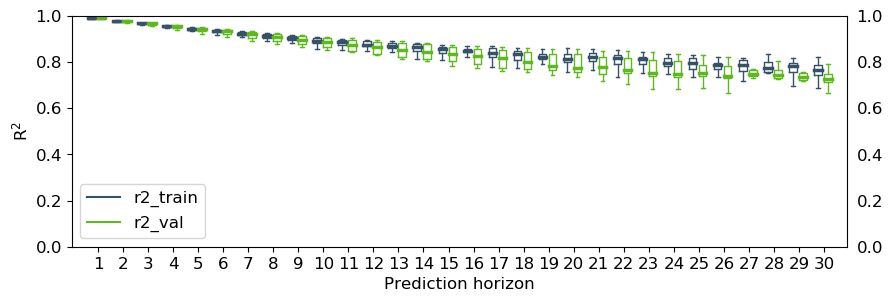

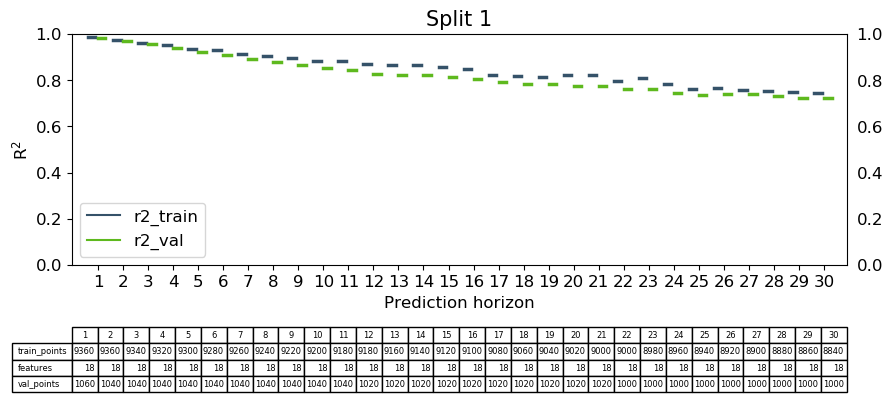

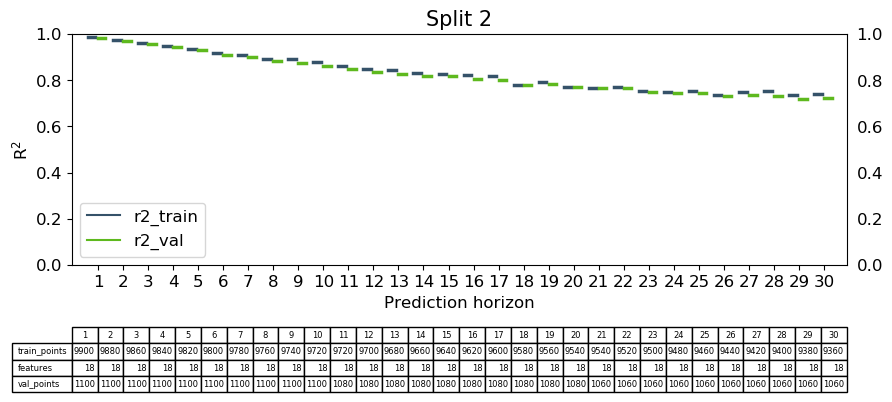

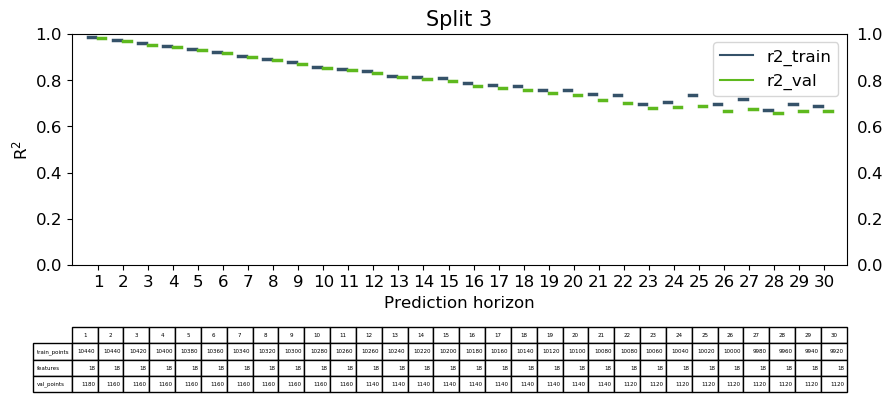

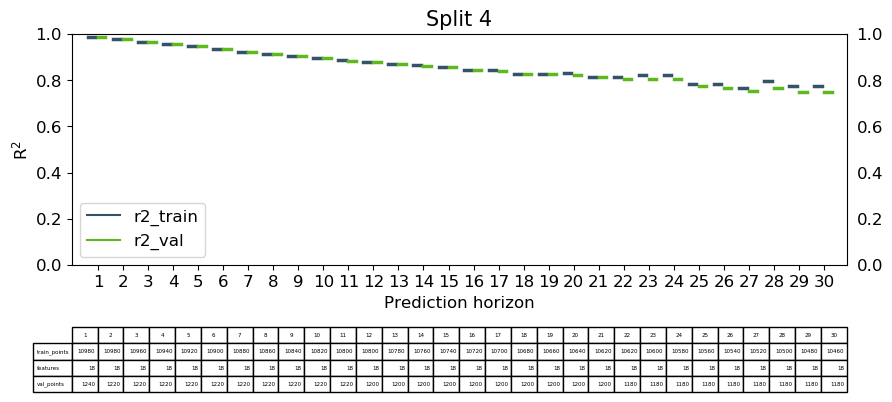

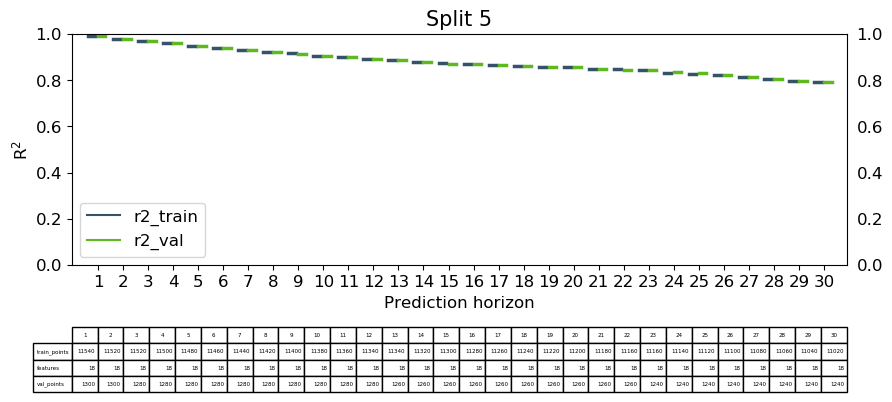

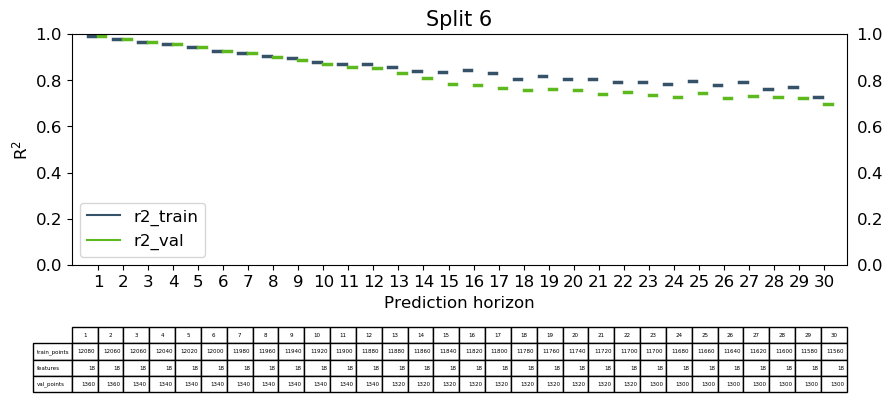

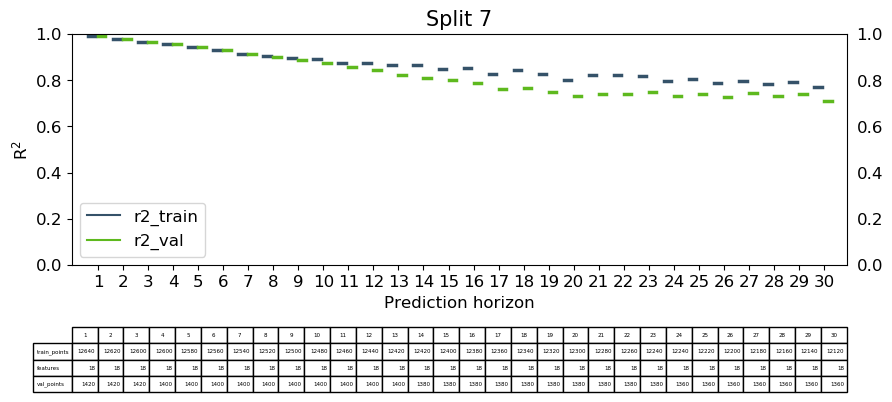

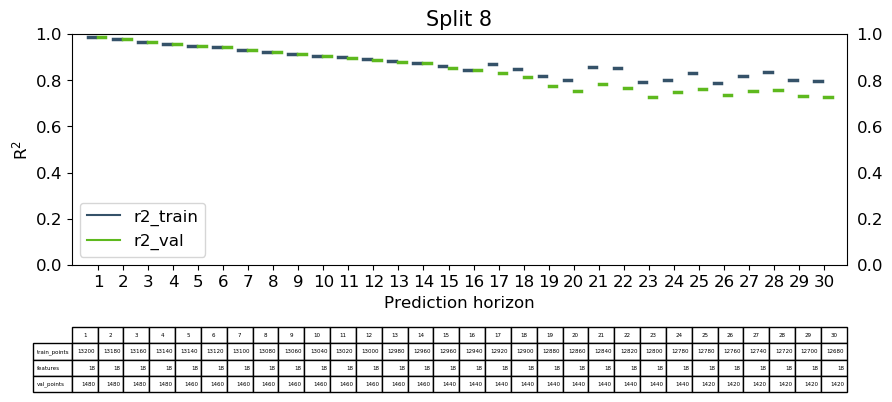

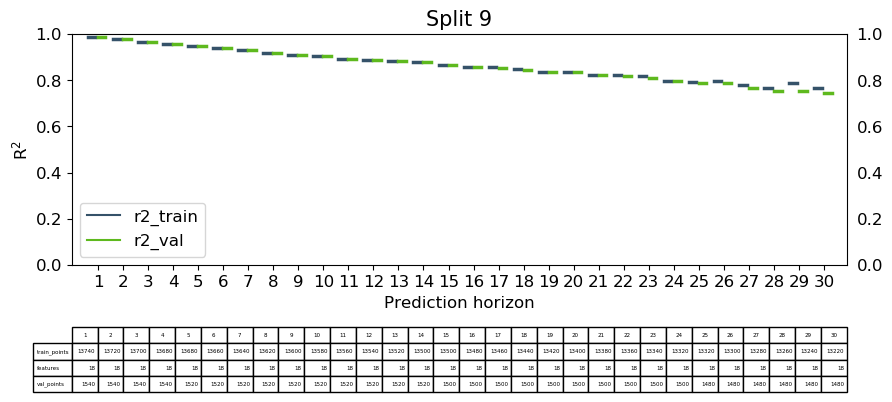

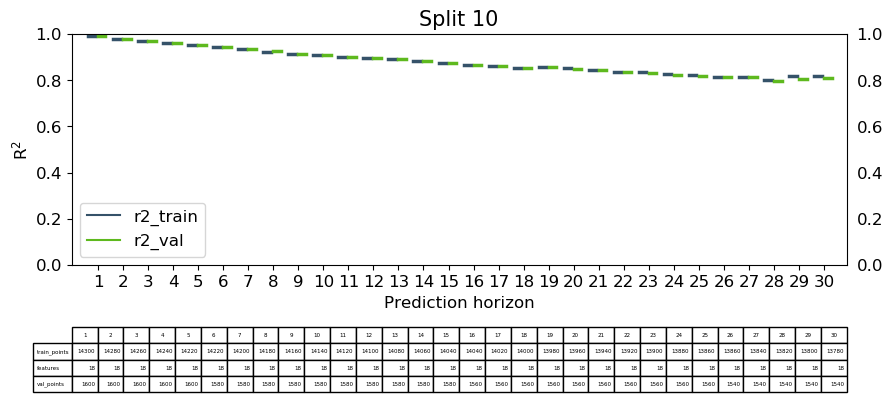

In [10]:
SPLITS = r2_results_hyper.columns.get_level_values(0).unique()

fig, ax = plt.subplots(figsize = (10, 3))    
plot_r2_box_plot(r2_results_hyper, ax, "r2_train", "r2_val", color1 = "#355269", color2 = "#5eb91e")
fig.savefig(dir_output + f"/r2_hyper.png" , bbox_inches = "tight", dpi = 300)
for split in SPLITS:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results_hyper[[split]], ax, "r2_train", "r2_val", title = f"Split {split}",
                     table = shapes_list[split].transpose(), color1 = "#355269", color2 = "#5eb91e");

# Forecasting

In [11]:
# Load forecasting results.
xls = pd.ExcelFile(dir_results + "/forecast.xlsx")

forecast_splits = dict()
for i,split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        # Reset the index.
        forecast_split.index = np.arange(1, len(forecast_split) + 1)
        forecast_split.index.names = ["Prediction horizon"]
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.head()

Split 1                                                  \
Country               Yemen                                                   
AdminStrata           Abyan                         Aden                      
Indicator               FCG   Forecast    Naive      FCG   Forecast   Naive   
Prediction horizon                                                            
1                   33.8163  34.673606  33.5917  28.3226  26.542893  26.548   
2                   33.5809  33.467733  33.5917  28.6218  26.498826  26.548   
3                   33.3487  32.859630  33.5917  28.5255  26.520767  26.548   
4                   37.2396  32.742795  33.5917  27.2494  26.595072  26.548   
5                   36.1143  33.010724  33.5917  28.0367  26.708095  26.548   

                                                           ... Split 10  \
Country                                                    ...    Yemen   
AdminStrata        Al Bayda                    Al Dhale'e  ...   Sa'ada   
Indicator               FCG   Forecast   Naive        FCG  ...    Naive   
Prediction horizon                                         ...            
1                   53.6394  55.533760  55.541    56.7963  ...  40.3751   
2                   53.1773  55.301516  55.541    57.5593  ...  40.3751   
3                   51.7404  55.175662  55.541    56.1376  ...  40.3751   
4                   52.0785  55.137080  55.541    54.3724  ...  40.3751   
5                   52.8980  55.166651  55.541    53.8939  ...  40.3751   

                                                                              \
Country                                                                        
AdminStrata          Sana'a                      Shabwah                       
Indicator               FCG   Forecast    Naive      FCG   Forecast    Naive   
Prediction horizon                                                             
1                   42.6981  44.280650  44.2104  52.8051  53.481506  53.3521   
2                   43.8512  44.332219  44.2104  52.4924  53.476339  53.3521   
3                   44.5177  44.399891  44.2104  54.2902  53.418410  53.3521   
4                   44.6783  44.477905  44.2104  55.4377  53.320652  53.3521   
5                   42.8225  44.560497  44.2104  55.5760  53.195997  53.3521   

                                                 
Country                                          
AdminStrata           Taizz                      
Indicator               FCG   Forecast    Naive  
Prediction horizon                               
1                   41.5994  44.682570  44.5244  
2                   40.7057  44.310478  44.5244  
3                   42.4463  44.092687  44.5244  
4                   42.9934  43.998511  44.5244  
5                   44.3141  43.997262  44.5244  

[5 rows x 600 columns]

In [12]:
training_shape = pd.read_csv(dir_results + "/training_shapes.csv", header = [0,1], index_col = 0)
training_shape.head()

Split         Split 1                  Split 2                  Split 3  \
Info  training points features training points features training points   
1               10420       19           11000       22           11620   
2               10400       24           10980       23           11600   
3               10380       24           10960       19           11580   
4               10360       22           10940       25           11560   
5               10340       25           10920       23           11540   

Split                  Split 4                  Split 5           \
Info  features training points features training points features   
1           24           12220       23           12840       26   
2           23           12200       23           12820       26   
3           21           12180       25           12800       22   
4           23           12160       23           12780       20   
5           23           12140       23           12760       24   

Split         Split 6                  Split 7                  Split 8  \
Info  training points features training points features training points   
1               13440       25           14060       22           14680   
2               13420       26           14040       21           14660   
3               13400       20           14020       25           14640   
4               13380       23           14000       20           14620   
5               13360       21           13980       24           14600   

Split                  Split 9                 Split 10           
Info  features training points features training points features  
1           20           15280       20           15900       23  
2           23           15260       22           15880       19  
3           18           15240       24           15860       22  
4           22           15220       21           15840       26  
5           21           15200       22           15820       19

In [13]:
loss_sites = pd.read_csv(dir_results + "/loss_sites.csv", index_col = [0, 1], header = [0, 1])
loss_sites.head()

Split                  Split 1              Split 10               Split 2  \
Type                 mse_model  mse_naive  mse_model  mse_naive  mse_model   
Country AdminStrata                                                          
Yemen   Abyan        30.287730   4.922155  28.227973   2.596294  21.759312   
        Aden          1.074966   2.456993  13.643063  32.175648   4.888277   
        Al Bayda     45.503935  55.623102   1.375248   2.296727   7.206131   
        Al Dhale'e   30.433497  42.680955   5.420387   5.162301   2.691403   
        Al Hudaydah  13.965556   9.791295   1.889183   7.866425   5.185142   

Split                             Split 3               Split 4             \
Type                 mse_naive  mse_model  mse_naive  mse_model  mse_naive   
Country AdminStrata                                                          
Yemen   Abyan         1.684034   5.201812   5.796971   4.499212   4.175584   
        Aden          5.184039   9.011224   5.482646   4.225856  11.437863   
        Al Bayda      6.040451  21.134536  25.045918   4.177940  43.531354   
        Al Dhale'e   15.453605   3.174519   2.302465  17.824117  88.459867   
        Al Hudaydah   9.435208   4.755715   2.692284   3.744445   2.866904   

Split                  Split 5              Split 6               Split 7  \
Type                 mse_model  mse_naive mse_model  mse_naive  mse_model   
Country AdminStrata                                                         
Yemen   Abyan        39.890842  17.765094  4.731279   3.840514  18.333280   
        Aden          4.741397   6.664560  3.894911   1.628246   9.856041   
        Al Bayda     81.885259  55.365287  5.916706   6.564782  37.609527   
        Al Dhale'e   16.668299  29.208086  1.034735  11.551643   5.522689   
        Al Hudaydah  15.299843  14.471344  4.826478   2.177530   7.632244   

Split                             Split 8               Split 9             
Type                 mse_naive  mse_model  mse_naive  mse_model  mse_naive  
Country AdminStrata                                                         
Yemen   Abyan        46.828456  31.931613  44.557904   0.501158   2.898569  
        Aden          7.273919   1.805665  17.523471  24.087796  25.670936  
        Al Bayda      6.401660   5.817992   6.163461   7.218422   5.561421  
        Al Dhale'e    3.045781  36.311348  17.157256   9.365486   5.442165  
        Al Hudaydah   2.679240  16.855557   4.062847   5.492633   4.184184

In [14]:
loss_h = pd.read_csv(dir_results + "/loss_h.csv", index_col = [0, 1], header = [0, 1])
loss_h.head()

Split                        Split 1            Split 10              Split 2  \
Type                       mse_model mse_naive mse_model mse_naive  mse_model   
Country Prediction horizon                                                      
Yemen   1                   0.912017  0.939103  1.479800  1.315197   1.236087   
        2                   1.887878  2.109219  2.691059  2.585327   2.638182   
        3                   5.011183  5.714559  2.806341  2.769154   5.252060   
        4                   5.225887  5.837641  3.955059  3.794114   8.281795   
        5                   7.934451  8.449338  4.995127  3.868749  10.627349   

Split                                   Split 3             Split 4            \
Type                        mse_naive mse_model mse_naive mse_model mse_naive   
Country Prediction horizon                                                      
Yemen   1                    1.173469  0.672697  0.600948  0.725368  0.618095   
        2                    2.842391  1.837092  1.758426  1.712651  1.886553   
        3                    5.957429  2.476419  2.185603  1.770339  2.895767   
        4                    9.259777  2.324927  1.791479  2.227857  3.957556   
        5                   12.019295  3.708691  3.491713  3.546923  6.446770   

Split                        Split 5             Split 6             Split 7  \
Type                       mse_model mse_naive mse_model mse_naive mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.435185  0.330632  1.280034  1.245638  0.816126   
        2                   1.898607  1.435605  1.929551  2.070214  1.526746   
        3                   3.317438  2.404251  3.848786  4.628615  4.307673   
        4                   5.436408  3.931279  4.386470  5.724273  4.736907   
        5                   9.242214  6.990794  3.725552  4.944836  5.631328   

Split                                  Split 8             Split 9            
Type                       mse_naive mse_model mse_naive mse_model mse_naive  
Country Prediction horizon                                                    
Yemen   1                   0.579478  0.502670  0.416228  1.260424  1.142622  
        2                   1.338666  0.891546  0.696497  2.490289  2.628987  
        3                   3.760728  2.539511  2.129639  3.777461  4.254725  
        4                   4.410411  3.556078  2.808405  4.220709  4.969025  
        5                   5.540683  6.442495  5.208835  5.060183  5.948917

In [15]:
loss_h.groupby(axis = 0, level = "Country").mean()

Split      Split 1              Split 10               Split 2             \
Type     mse_model  mse_naive  mse_model  mse_naive  mse_model  mse_naive   
Country                                                                     
Yemen    19.791469  18.649203  10.517556  11.603181  15.053065  20.024144   

Split      Split 3               Split 4               Split 5             \
Type     mse_model  mse_naive  mse_model  mse_naive  mse_model  mse_naive   
Country                                                                     
Yemen    15.385873  13.578766  11.914493  49.183387  34.405936  34.232636   

Split      Split 6               Split 7               Split 8             \
Type     mse_model  mse_naive  mse_model  mse_naive  mse_model  mse_naive   
Country                                                                     
Yemen    12.701538  18.359786  13.267896  13.894737  17.486721  17.503912   

Split     Split 9             
Type    mse_model  mse_naive  
Country                       
Yemen    9.896807  14.065781

In [16]:
r2_results = pd.read_csv(dir_results + "/r2_results.csv", index_col = 0, header = [0, 1, 2])
r2_results.head()

Country                Yemen                                          \
Split                Split 1            Split 10             Split 2   
Type                r2_model  r2_naive  r2_model  r2_naive  r2_model   
Prediction horizon                                                     
1                   0.991008  0.990741  0.982960  0.984855  0.981577   
2                   0.981519  0.979353  0.970277  0.971445  0.961221   
3                   0.949901  0.942869  0.969186  0.969595  0.921947   
4                   0.945868  0.939532  0.956442  0.958214  0.882067   
5                   0.917250  0.911881  0.945117  0.957493  0.848112   

Country                                                               \
Split                          Split 3             Split 4             
Type                r2_naive  r2_model  r2_naive  r2_model  r2_naive   
Prediction horizon                                                     
1                   0.982511  0.993069  0.993808  0.993966  0.994858   
2                   0.958220  0.981297  0.982098  0.985359  0.983872   
3                   0.911464  0.975158  0.978076  0.984314  0.974342   
4                   0.868141  0.975657  0.981242  0.980077  0.964609   
5                   0.828218  0.960619  0.962923  0.966564  0.939228   

Country                                                               \
Split                Split 5             Split 6             Split 7   
Type                r2_model  r2_naive  r2_model  r2_naive  r2_model   
Prediction horizon                                                     
1                   0.993817  0.995303  0.985876  0.986256  0.988350   
2                   0.974314  0.980578  0.978482  0.976913  0.978029   
3                   0.952208  0.965363  0.955638  0.946649  0.938765   
4                   0.921838  0.943478  0.950582  0.935510  0.933079   
5                   0.876653  0.906701  0.959244  0.945906  0.921411   

Country                                                               
Split                          Split 8             Split 9            
Type                r2_naive  r2_model  r2_naive  r2_model  r2_naive  
Prediction horizon                                                    
1                   0.991728  0.995111  0.995952  0.987675  0.988827  
2                   0.980736  0.991238  0.993155  0.974689  0.973280  
3                   0.946540  0.975029  0.979060  0.962430  0.957683  
4                   0.937691  0.964953  0.972322  0.956038  0.948243  
5                   0.922676  0.939501  0.951086  0.948456  0.939404

## Total prediction loss for the sites among the various splits

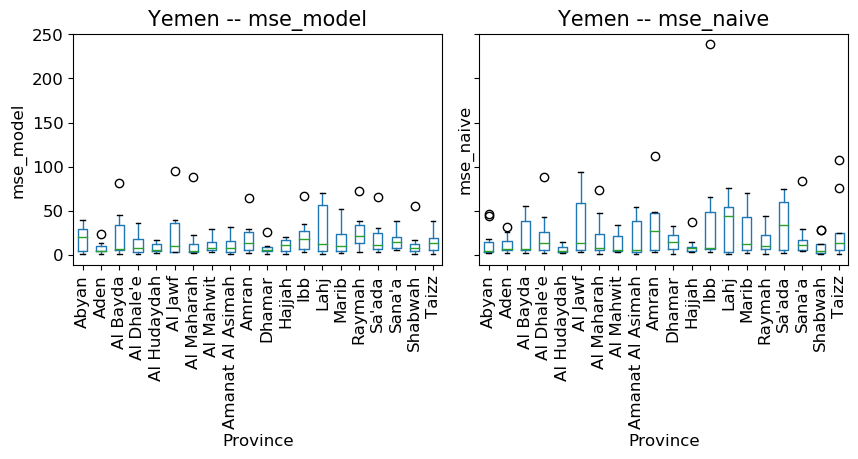

In [17]:
COUNTRIES = loss_sites.index.get_level_values(0).unique()
TYPES = loss_sites.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = 2
# Define the number of figures on y axis.
rows = len(COUNTRIES)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (5*cols, 3*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.1, hspace = 0.8)
for j,country in enumerate(COUNTRIES):
    for i,m in enumerate(TYPES):         
        value = loss_sites.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        # Create box-plot.
        value.transpose().reset_index(drop = True).boxplot(rot = 90, ax = axs[j,i])
        # Set attributes box-plot.
        axs[j,i].set_title(f"{country} -- {m}")
        axs[j,i].set_xlabel("Province")
        axs[j,i].set_ylabel(m)
        axs[j,i].grid(b = None)

## Loss of each split as function of the prediction horizon

In [18]:
colors = ["dodgerblue", "deeppink"]

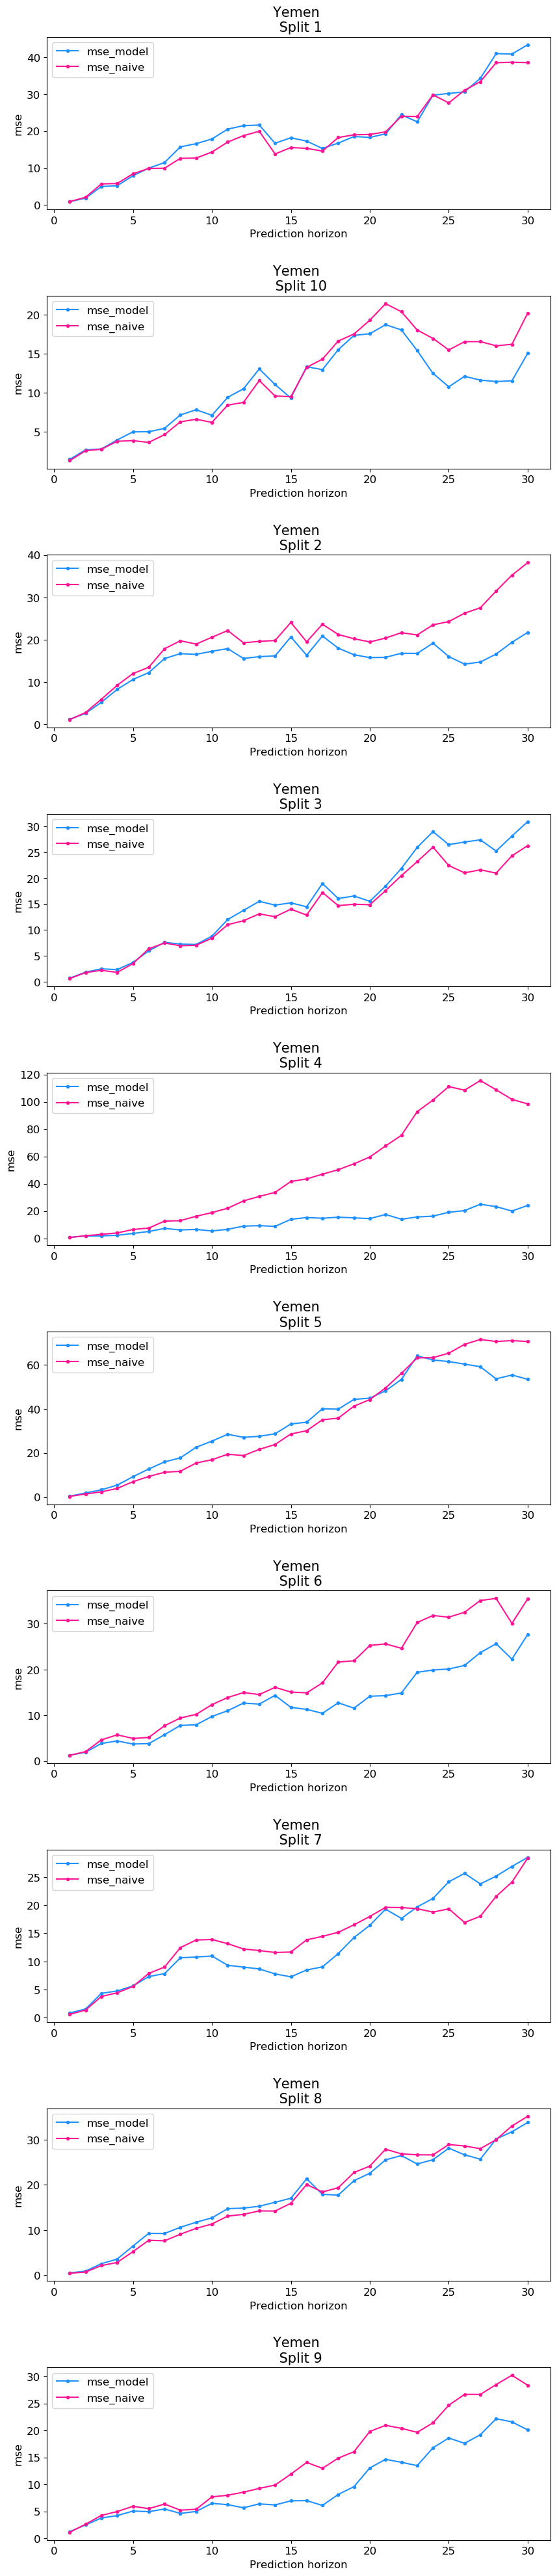

In [19]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = len(COUNTRIES)
# Define the number of figures on y axis.
rows = len(SPLITS)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, figsize = (10*cols, 5*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.05, hspace = 0.5)
for j,country in enumerate(COUNTRIES):
    for i,split in enumerate(SPLITS):      
        value = loss_h.loc[(country, split)]
        for k,m in enumerate(TYPES):  
            # Plot.
            value[m].plot(style = ".-", label = m, ax = axs[i,j], c = colors[k])
            # Set attributes of the plot.
            axs[i,j].set_title(f"{country} \n {split}")
            axs[i,j].legend(loc = "best")
            axs[i,j].set_xlabel("Prediction horizon")
            axs[i,j].set_ylabel("mse")

## Total loss over the splits as function of the prediction horizon

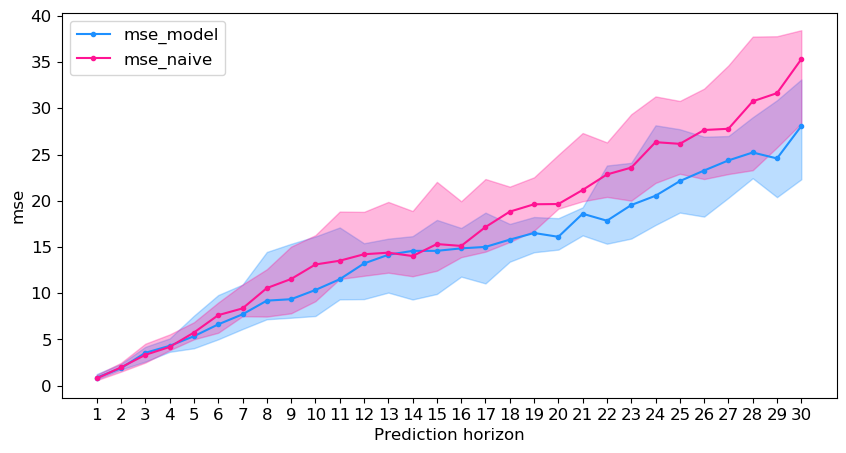

In [20]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([lambda x: x.quantile(0.25), np.median, lambda x: x.quantile(0.75)], axis = 1)
        value_statistic.columns = ["lower_quantile", "median", "upper_quantile"]

        # Plot.
        value_statistic["median"].plot(style = ".-", label = m, ax = axs, c = colors[i])
        axs.fill_between(x = value_statistic["median"].index, y1 = value_statistic["lower_quantile"], 
                         y2 = value_statistic["upper_quantile"], color = colors[i], alpha = 0.3)
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}.png", bbox_inches = "tight", dpi = 300)

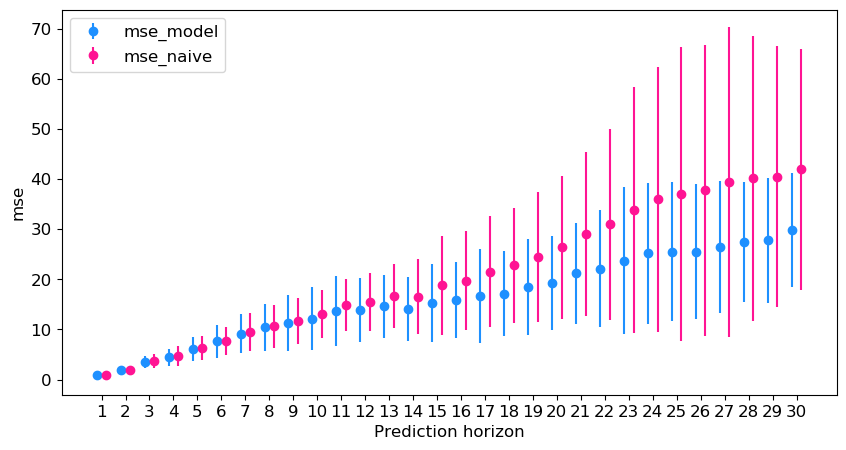

In [21]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([np.mean, np.std], axis = 1)
        value_statistic.columns = ["mean", "std"]

        # Plot.
        if i == 0:
            trans1 = Affine2D().translate(-0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans1, c = colors[i], label = m)
        else:
            trans2 = Affine2D().translate(+0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans2, c = colors[i], label = m)
        
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}_mean.png", bbox_inches = "tight", dpi = 300)

## r2 scores

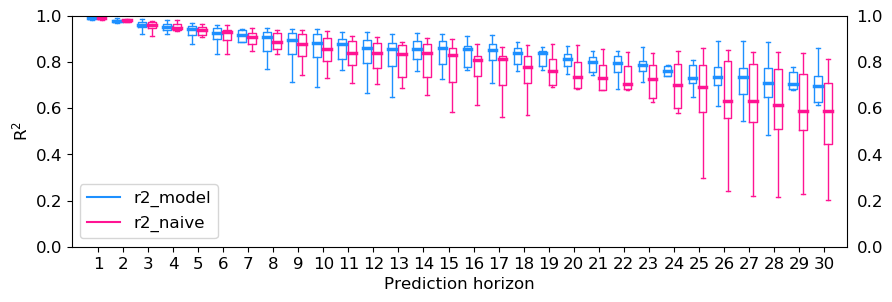

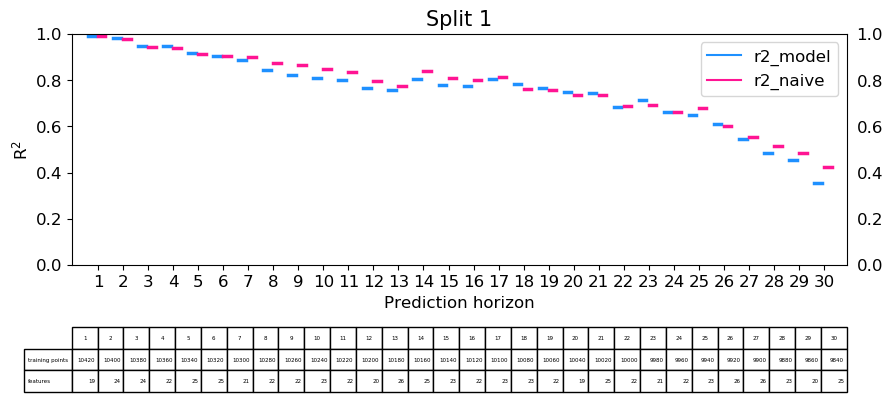

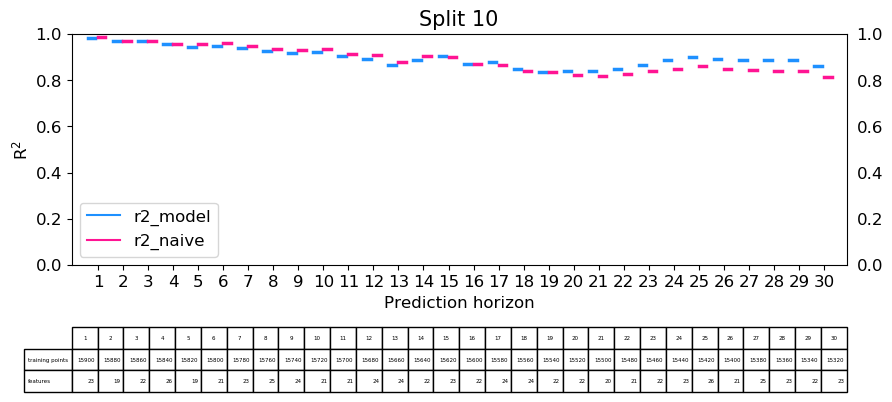

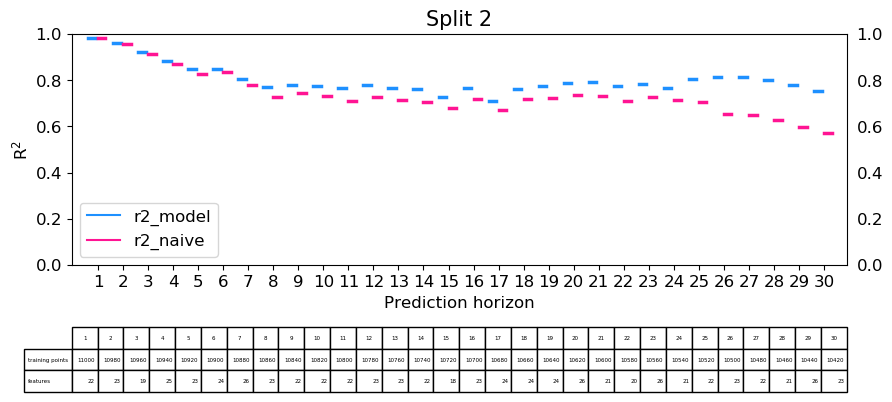

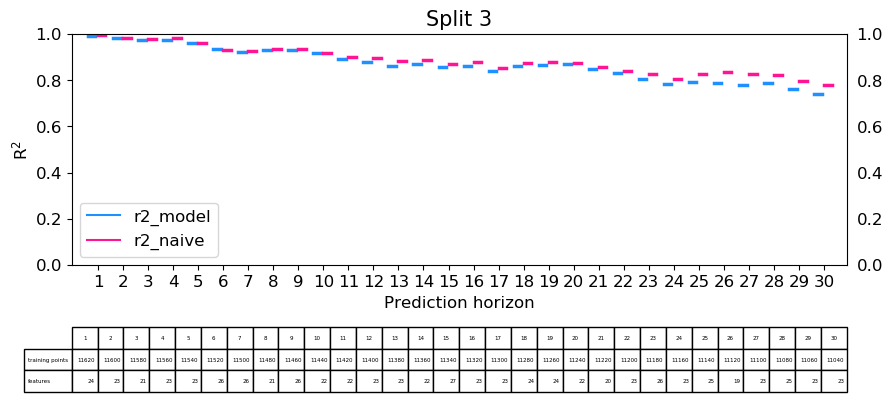

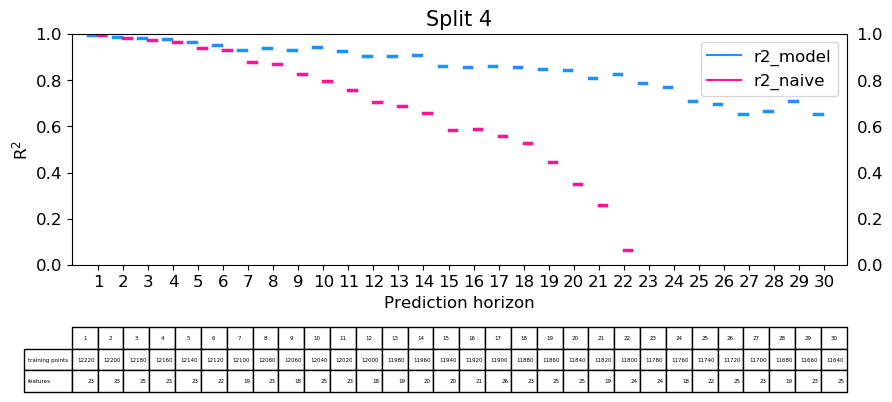

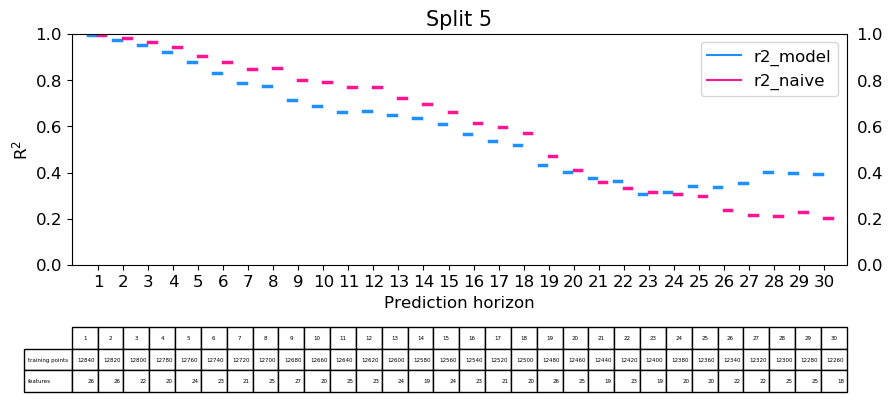

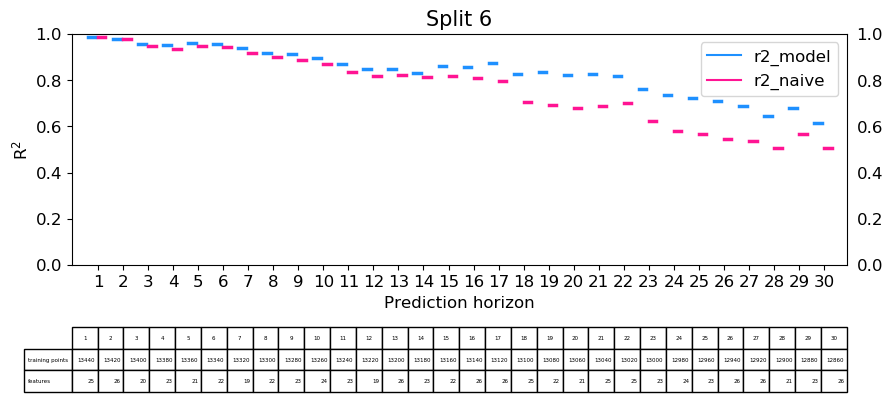

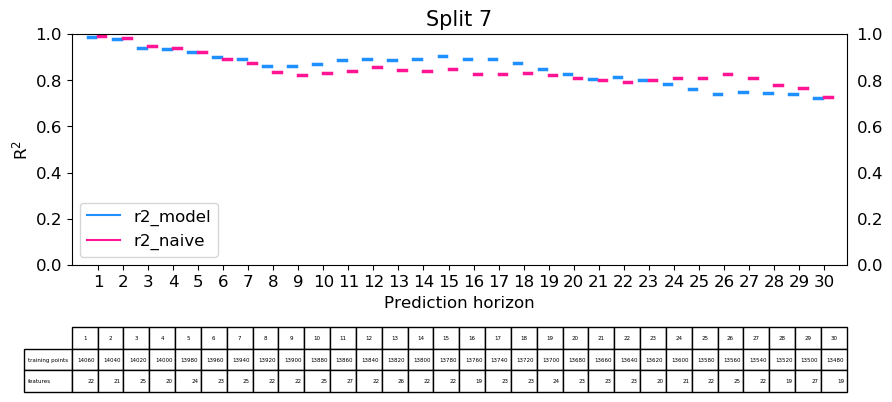

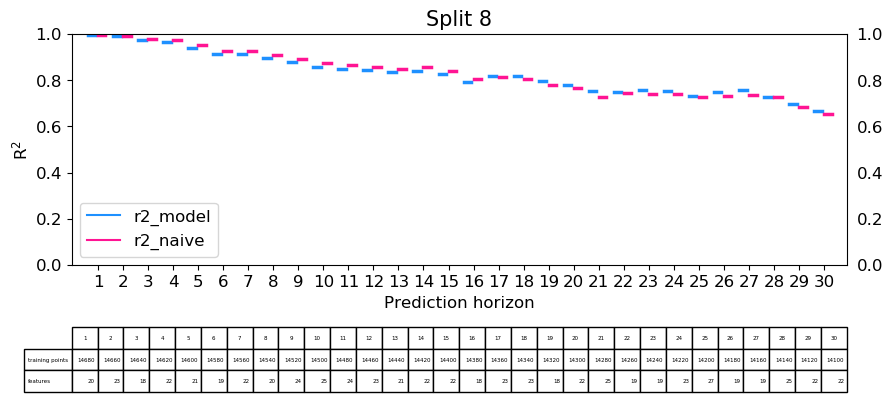

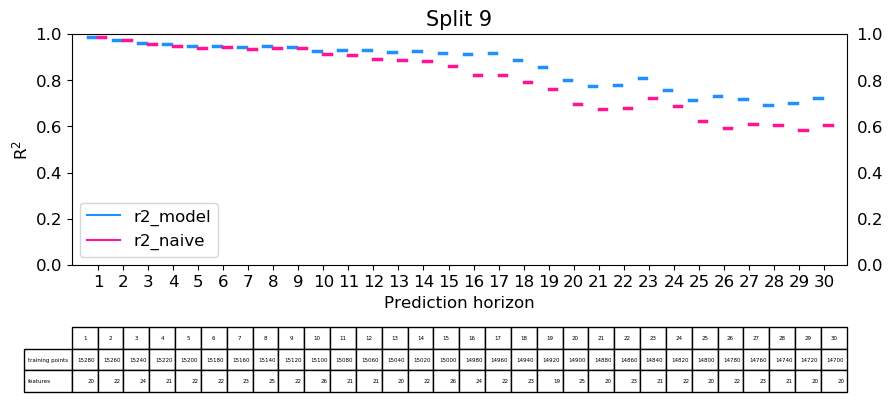

In [22]:
COUNTRIES = r2_results.columns.get_level_values(0).unique()
SPLITS = r2_results.columns.get_level_values(1).unique()

for country in COUNTRIES:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results[country], ax, "r2_model", "r2_naive")
    fig.savefig(dir_output + f"/r2_{country}.png" , bbox_inches = "tight", dpi = 300)
    for split in SPLITS:
        fig, ax = plt.subplots(figsize = (10, 3))    
        plot_r2_box_plot(r2_results[country][[split]], ax, "r2_model", "r2_naive", title = split,
                         table = training_shape[split].transpose());

## Actual vs Forecast

In [23]:
mStyles = ["s","+","x","h","v","^","o","H","*","D"]

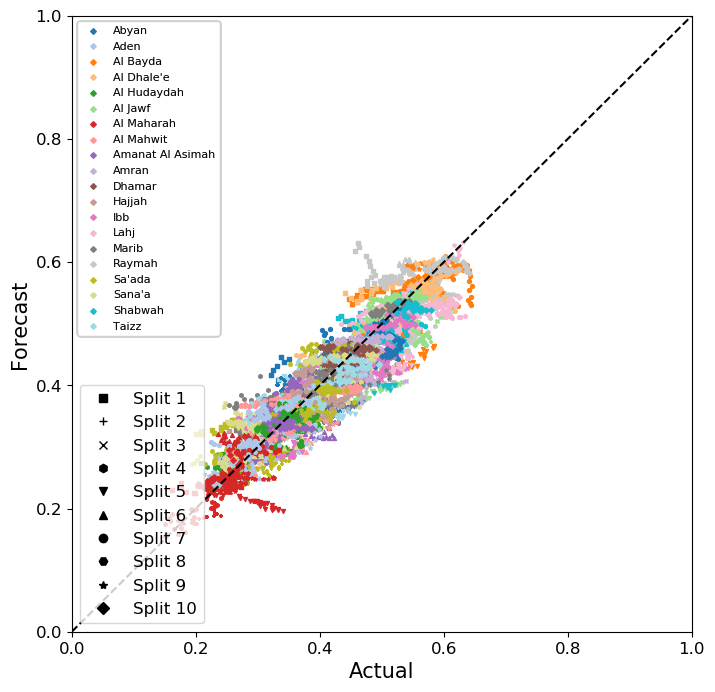

In [24]:
COUNTRIES = forecast_splits.columns.get_level_values(1).unique()
SPLITS = forecast_splits.columns.get_level_values(0).unique()

for country in COUNTRIES:
    PROVINCES = forecast_splits.xs(country, axis = 1, level = 1).columns.get_level_values(1).unique()
    colors = {province: plt.get_cmap("tab20")(i) for i,province in enumerate(PROVINCES)}
    
    fig, axs = plt.subplots(figsize = (8, 8))
    # Add bisector.
    axs.plot(axs.get_xlim(), axs.get_ylim(), color = "black", linestyle = "--")

    for i,split in enumerate(SPLITS):
        predictions = forecast_splits[(split, country)]
        predictions = predictions.drop(["Naive"], axis = 1, level = 1)
        predictions = predictions/100
   
        def plot_scatter(group):
            gr = group[group.name]
            gr.plot.scatter(x = "FCG", y = "Forecast", s = 8, marker = mStyles[i], color = colors[group.name], 
                            ax = axs, label = group.name)

        predictions.groupby(axis = 1, level = 0).apply(plot_scatter)

        # Legend.
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        leg = plt.legend(by_label.values(), by_label.keys(), loc = "upper left", prop = {"size": 8})
        axs.add_artist(leg)
        h = [plt.plot([],[], color = "black", marker = mStyles[i], ls = "")[0] for i,cplit in enumerate(SPLITS)]
        axs.legend(handles = h, labels = [split for split in SPLITS], loc = "lower left")
        axs.set_xlim(0, 1)
        axs.set_ylim(0, 1)

    axs.set_xlabel("Actual", fontsize = 15)
    axs.set_ylabel("Forecast", fontsize = 15)

    fig.savefig(dir_output + f"/scatter_{country}.png", bbox_inches = "tight", dpi = 300)

## Features importance

In [16]:
SPLIT_FEATURE_IMPORTANCE = 10
prediction_horizons = [1,14,21,28]

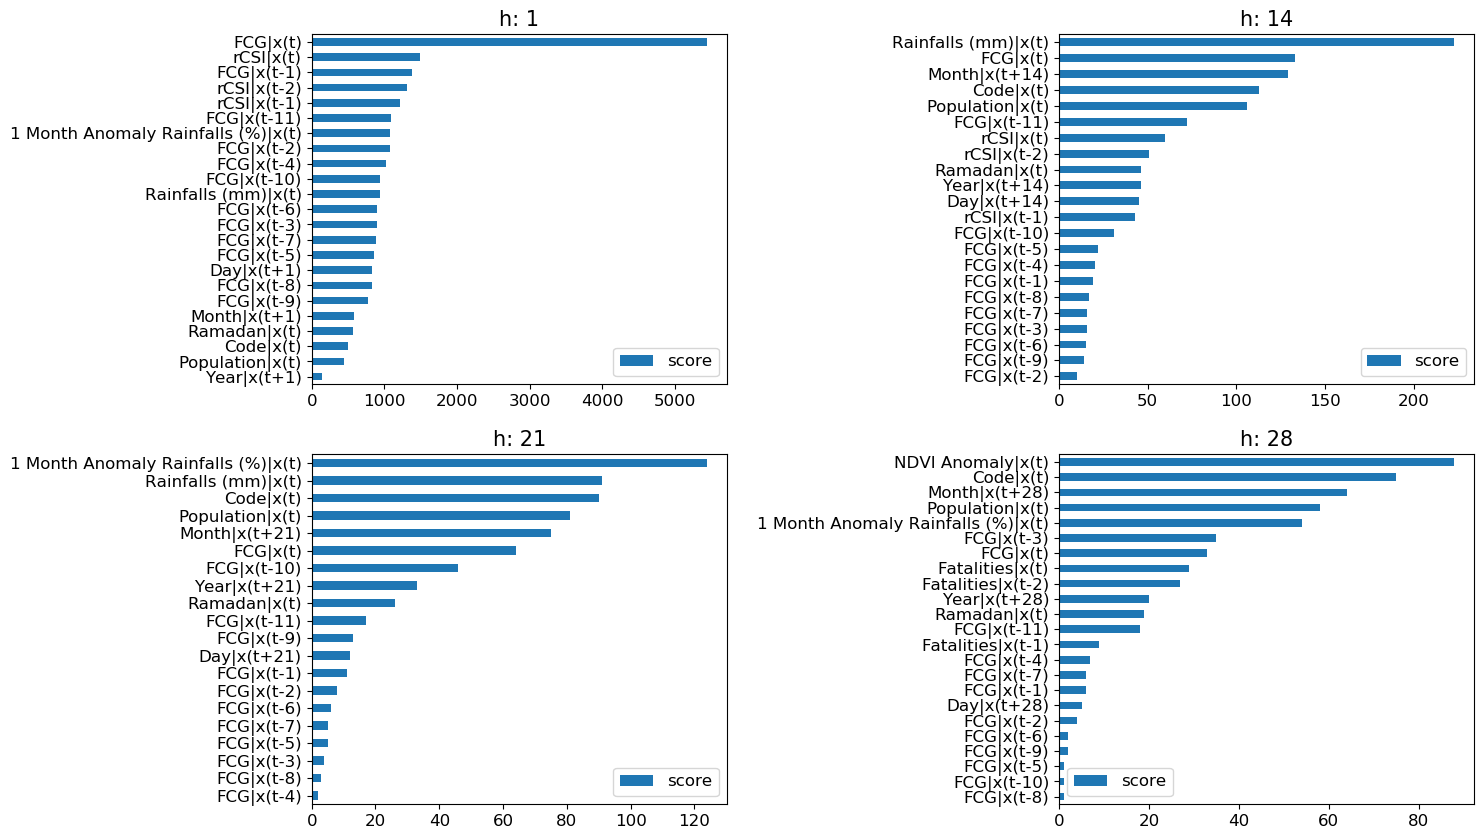

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(wspace = 0.8)

for i, h in enumerate(prediction_horizons):
    with open(dir_results + f"/features_importance/features_split_{SPLIT_FEATURE_IMPORTANCE}_h_{h}", "rb") as fp:
        f_imp = pickle.load(fp)
        
    keys = list(f_imp.keys())
    values = list(f_imp.values())
    data = pd.DataFrame(data = values, index = keys, columns = ["score"]).sort_values(by = "score", ascending = True)    
    data.plot(kind = "barh", ax = axs.flatten()[i])
    axs.flatten()[i].set_title(f"h: {h}")